In [ ]:
# SVM on JOb title, Job Description classification.

#!pip install nltk

In [64]:
import pandas as pd
import json
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords

In [67]:
# Download NLTK data (run this once)
try:
    nltk.data.find('corpora/stopwords')
except:
    nltk.download('stopwords')

print("Libraries imported and NLTK data downloaded.")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\deep8893\AppData\Roaming\nltk_data...


Libraries imported and NLTK data downloaded.


[nltk_data]   Unzipping corpora\stopwords.zip.


In [68]:
df= pd.read_csv("E:\ML\Data\job_title_des.csv", usecols=['Job Title','Job Description'])#, names=['label','name', 'description']
df.head(3)

,Job Title,Job Description
0,Flutter Developer,We are looking for hire experts flutter develo...
1,Django Developer,PYTHON/DJANGO (Developer/Lead) - Job Code(PDJ ...
2,Machine Learning,"Data Scientist (Contractor)\n\nBangalore, IN\n..."


In [74]:
from nltk.stem import SnowballStemmer
import re
#data preprocessing
stemmer = SnowballStemmer('english')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    if not isinstance (text, str):
        return ""
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    words = text.split()
    words = [word for word in words if word not in stop_words]
    words = [stemmer.stem(word) for word in words]
    return " ".join(words)

In [75]:
df['Processed Description'] = df['Job Description'].apply(preprocess_text)
df.head(3)

In [80]:
df.dropna(subset=['Job Title', 'Processed Description'], inplace=True)
df = df[df['Processed Description'].str.strip() != '']

In [81]:
df.shape

(2277, 3)

In [82]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=5000)

In [83]:
X = tfidf_vectorizer.fit_transform(df['Processed Description'])
y = df['Job Title'] # Target variable

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 1821 samples
Testing set size: 456 samples


In [119]:
for i in np.arange(0,5,0.5):
    print(i)

0.0
0.5
1.0
1.5
2.0
2.5
3.0
3.5
4.0
4.5


In [120]:
from sklearn.svm import SVC

accuracies = []
for r in np.arange(1,5,0.5):
    svm_model = SVC(kernel='linear', C=r, random_state=42)
    svm_model.fit(X_train, y_train)
    y_pred = svm_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

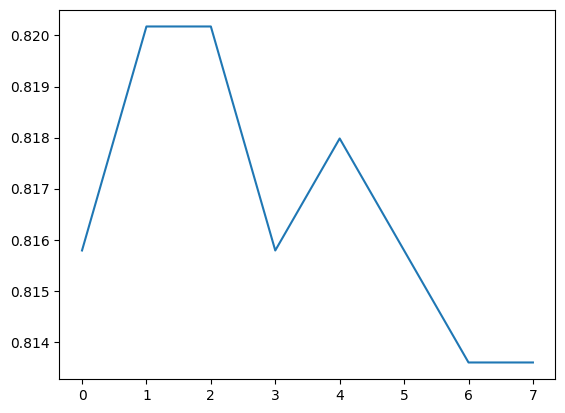

In [121]:
plt.plot(np.arange(len(accuracies)), accuracies)
plt.show()

In [104]:
from sklearn.metrics import classification_report, accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8180


In [97]:
new_descriptions = [
    "A senior software engineer with strong Python and Java skills, experience in cloud technologies like AWS and machine learning. Develops scalable applications.",
    "Entry-level marketing assistant to help with social media campaigns, content creation, and market research. Good communication skills required.",
    "Hiring a data scientist with expertise in statistical modeling, machine learning, and big data tools. Proficient in R or Python.",
    "We need a customer support representative for technical issues. Must have good problem-solving skills and experience with ticketing systems."
]
processed_new_descriptions = [preprocess_text(desc) for desc in new_descriptions]
X_new = tfidf_vectorizer.transform(processed_new_descriptions)

new_predictions = svm_model.predict(X_new)

for i, desc in enumerate(new_descriptions):
    print(f"\nOriginal Description: {desc}")
    print(f"Predicted Job Title: {new_predictions[i]}")


Original Description: A senior software engineer with strong Python and Java skills, experience in cloud technologies like AWS and machine learning. Develops scalable applications.
Predicted Job Title: Machine Learning

Original Description: Entry-level marketing assistant to help with social media campaigns, content creation, and market research. Good communication skills required.
Predicted Job Title: Full Stack Developer

Original Description: Hiring a data scientist with expertise in statistical modeling, machine learning, and big data tools. Proficient in R or Python.
Predicted Job Title: Machine Learning

Original Description: We need a customer support representative for technical issues. Must have good problem-solving skills and experience with ticketing systems.
Predicted Job Title: Network Administrator


In [98]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0)) # zero_division=0 handles cases with no true samples for a label


Classification Report:
                        precision    recall  f1-score   support

     Backend Developer       0.47      0.59      0.52        29
Database Administrator       0.96      0.93      0.95        28
       DevOps Engineer       0.91      0.97      0.94        31
      Django Developer       0.96      0.71      0.81        31
     Flutter Developer       0.90      0.90      0.90        31
  Full Stack Developer       0.81      0.79      0.80        28
        Java Developer       0.58      0.66      0.62        32
  JavaScript Developer       0.87      0.82      0.84        33
      Machine Learning       1.00      0.87      0.93        31
 Network Administrator       1.00      0.86      0.93        29
     Node js developer       0.93      0.84      0.89        32
         PHP Developer       0.90      0.84      0.87        31
     Software Engineer       0.46      0.66      0.54        32
   Wordpress Developer       0.92      0.92      0.92        26
         iOS De

In [1]:
import pandas as pd
import json
from sklearn.model_selection import train_test_split
import transformers
from transformers import AutoTokenizer
import torch
import numpy as np
from transformers import DistilBertTokenizer
from transformers import DistilBertForSequenceClassification

C:\Users\deep8893\AppData\Local\anaconda3\envs\myenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import pandas as pd
df= pd.read_csv("E:\ML\Data\job_title_des.csv", usecols=['Job Title','Job Description'])#, names=['label','name', 'description']
df.head(3)

,Job Title,Job Description
0,Flutter Developer,We are looking for hire experts flutter develo...
1,Django Developer,PYTHON/DJANGO (Developer/Lead) - Job Code(PDJ ...
2,Machine Learning,"Data Scientist (Contractor)\n\nBangalore, IN\n..."


In [3]:
df[df.isnull().any(axis=1)]

,Job Title,Job Description


In [4]:
df['Job Title Cleaned'] = df['Job Title'].str.lower().str.strip()
unique_job_titles = df['Job Title Cleaned'].unique()
label_to_id = {label: i for i, label in enumerate(unique_job_titles)}
id_to_label = {label:i for label, i in enumerate(unique_job_titles)}
df['labels'] = df['Job Title Cleaned'].map(label_to_id)

In [125]:
train_df.head(20)

,Job Title,Job Description,Job Title Cleaned,labels
1074,Flutter Developer,"As a Flutter Developer, you will create multi-...",flutter developer,0
1830,Backend Developer,Project Description:\n\nLuxoft FM technology p...,backend developer,12
1935,Software Engineer,Infoblox is seeking a Software Engineer I to j...,software engineer,8
1730,Database Administrator,database administrator ii responsible providin...,database administrator,9
1744,JavaScript Developer,About Accenture: Accenture is a leading global...,javascript developer,6
1588,Backend Developer,PiMARQ JD Code: 047\n\nRole Name: Backend Deve...,backend developer,12
279,PHP Developer,Kochi\n\nUrgent Requirements of Php/laravel De...,php developer,11
10,Database Administrator,richardsontexasunited state bausp4 boeing comp...,database administrator,9
2016,iOS Developer,Basic Requirements:\nMin of 3 year’s solid exp...,ios developer,3
405,iOS Developer,iTool Solutions is looking for an iOS Develope...,ios developer,3


In [6]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['labels'])

In [7]:
num_labels = len(unique_job_titles)  # original 10, unique: 8

model_name = "distilbert-base-uncased"
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased',num_labels=num_labels)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [8]:
def manual_encode_data(df, tokenizer, max_length):
    descriptions = df['Job Description'].tolist()
    labels = df['labels'].tolist()

    input_ids = []
    attention_masks = []

    for desc in descriptions:
        encoded_dict = tokenizer.encode_plus(desc, add_special_tokens=True,max_length=max_length, padding='max_length',
                                             truncation=True, return_attention_mask=True,return_tensors='pt')
        input_ids.append(encoded_dict['input_ids'])        
        attention_masks.append(encoded_dict['attention_mask'])

    # Stack the list of tensors into a single tensor
    input_ids = torch.cat(input_ids, dim=0) #row wise stacking
    attention_masks = torch.cat(attention_masks, dim=0)
    labels = torch.tensor(labels)
    return input_ids, attention_masks, labels

In [9]:
max_length = 512
train_input_ids, train_attention_mask, train_labels = manual_encode_data(train_df, tokenizer, max_length)
test_input_ids, test_attention_mask, test_labels = manual_encode_data(test_df, tokenizer, max_length)

In [57]:
train_input_ids.shape

torch.Size([1821, 512])

In [58]:
train_labels.shape

torch.Size([1821])

In [11]:
from torch.utils.data import TensorDataset, DataLoader

train_dataset = TensorDataset(train_input_ids, train_attention_mask, train_labels)
test_dataset = TensorDataset(test_input_ids, test_attention_mask, test_labels)


batch_size = 8 # Adjust based on your GPU memory
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
num_labels = len(unique_job_titles)
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased',num_labels=num_labels)

# Move model to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

In [20]:
optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)
criterion = torch.nn.CrossEntropyLoss()

In [23]:
#from torch.cuda.amp import GradScaler, autocast # Import these
#scaler = GradScaler()
num_epochs = 4
torch.cuda.empty_cache()
train_loss_values = []
for epoch in range(num_epochs):
    running_loss = 0
    batches_processed_in_interval = 0
    for i , (inputs, attention_mask, labels) in enumerate(train_dataloader):
        optimizer.zero_grad()
        inputs = inputs.to(device)
        labels = labels.to(device)
        attention_mask = attention_mask.to(device)        
        outputs = model(input_ids=inputs, attention_mask=attention_mask)
        logits = outputs.logits
        loss = criterion(logits, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        batches_processed_in_interval +=1
        if (batches_processed_in_interval % 30) == 0:
            print(f"Epoch: {epoch} Iteration: {i} Loss: {running_loss/50}")
            train_loss_values.append(running_loss/50)
            running_loss = 0.0

Epoch: 0 Iteration: 29 Loss: 0.28267167404294014
Epoch: 0 Iteration: 59 Loss: 0.41201367408037187
Epoch: 0 Iteration: 89 Loss: 0.39753485321998594
Epoch: 0 Iteration: 119 Loss: 0.32261729255318644
Epoch: 0 Iteration: 149 Loss: 0.310393425822258
Epoch: 0 Iteration: 179 Loss: 0.3927838885784149
Epoch: 0 Iteration: 209 Loss: 0.3738526917994022
Epoch: 1 Iteration: 29 Loss: 0.21647955298423768
Epoch: 1 Iteration: 59 Loss: 0.25230897329747676
Epoch: 1 Iteration: 89 Loss: 0.2654202638566494
Epoch: 1 Iteration: 119 Loss: 0.18561975307762624
Epoch: 1 Iteration: 149 Loss: 0.2134556944295764
Epoch: 1 Iteration: 179 Loss: 0.26608351975679395
Epoch: 1 Iteration: 209 Loss: 0.2758141802251339
Epoch: 2 Iteration: 29 Loss: 0.1393681166321039
Epoch: 2 Iteration: 59 Loss: 0.12818842831999064
Epoch: 2 Iteration: 89 Loss: 0.15849338624626397
Epoch: 2 Iteration: 119 Loss: 0.16306732539087535
Epoch: 2 Iteration: 149 Loss: 0.16892012454569338
Epoch: 2 Iteration: 179 Loss: 0.14335621051490308
Epoch: 2 Iteratio

In [22]:
len(train_dataloader)

228

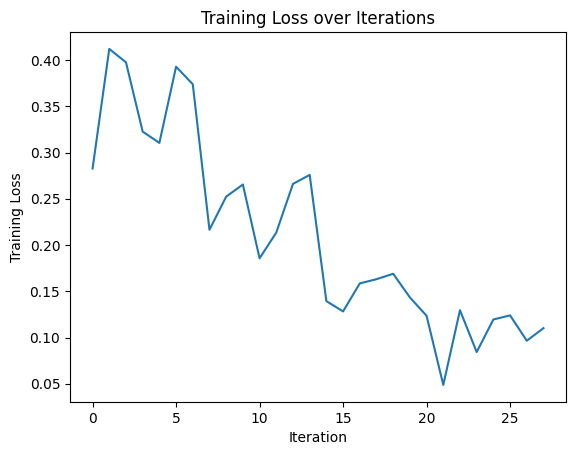

In [25]:
import matplotlib.pyplot as plt
plt.plot(np.arange(len(train_loss_values)), train_loss_values)
plt.title("Training Loss over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Training Loss")
plt.show()

In [26]:
model.eval()
predictions=[]
true_labels=[]
with torch.no_grad():
    for inputs,attention_mask,labels in test_dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        attention_mask = attention_mask.to(device)
        outputs = model(input_ids=inputs, attention_mask=attention_mask)
        _, predicted = torch.max(outputs[0],dim=1)
        predictions.extend(predicted.cpu().numpy().tolist())
        true_labels.extend(labels.cpu().numpy().tolist())

In [27]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
f1 = f1_score(true_labels, predictions, average='macro')
print(f"F1 Score: {f1}")
# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(true_labels, predictions))
# Classification Report
print("Classification Report:")
print(classification_report(true_labels, predictions))

F1 Score: 0.8577597677320399
Confusion Matrix:
[[30  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 30  0  0  0  0  0  0  0  0  0  0  1  0  0]
 [ 0  0 29  0  0  0  0  0  1  0  0  0  1  0  0]
 [ 0  0  1 30  0  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0 28  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0 22  1  1  4  0  0  1  2  0  0]
 [ 0  0  0  0  0  1 24  0  2  0  0  1  4  0  1]
 [ 0  1  0  0  0  1  0 28  0  0  0  0  1  0  0]
 [ 0  0  1  0  0  1  0  2 25  0  0  0  3  0  0]
 [ 0  0  0  0  2  0  0  0  0 26  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 25  0  1  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  4 23  3  0  0]
 [ 1  4  0  0  0  2  0  0  1  0  2  1 18  0  0]
 [ 0  0  0  0  0  0  0  2  2  0  0  0  0 25  0]
 [ 0  0  0  0  0  1  2  0  0  0  0  0  2  0 27]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95        31
           1       0.86      0.97      0.91        31
           2       0.94      0.94      0.94   

In [49]:
def predict_job_title_manual(description, model, tokenizer, id_to_label, top_k=5):
    model.eval()
    
    # Manually encode the query description
    encoded_dict = tokenizer.encode_plus(
        description,
        add_special_tokens=True,
        max_length=max_length,
        padding='max_length',
        truncation=True,
        return_attention_mask=True,
        return_tensors='pt',
    )
    
    inputs = {
        'input_ids': encoded_dict['input_ids'],
        'attention_mask': encoded_dict['attention_mask']
    }
    
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    inputs = {k: v.to(device) for k, v in inputs.items()}
    model.to(device) # Ensure model is on the correct device

    with torch.no_grad():
        outputs = model(**inputs)
    
    logits = outputs.logits
    probabilities = torch.softmax(logits, dim=1)
    
    top_k_probs, top_k_indices = torch.topk(probabilities, top_k)
    
    predictions = []
    for i in range(top_k):
        predicted_id = top_k_indices[0][i].item()
        predicted_label = id_to_label[predicted_id]
        probability = top_k_probs[0][i].item()
        predictions.append({"Job Title": predicted_label, "Probability": probability})
        
    return predictions

In [123]:
# Example usage:
query_description = "Seeking a highly motivated individual with experience in data analysis, machine learning, and Python programming. Responsibilities include building predictive models and developing data pipelines."
predicted_job_titles = predict_job_title_manual(query_description, model, tokenizer, id_to_label, top_k=3)
print(f"\nQuery Description: {query_description}\n")
print("Most probable Job Titles:")
for pred in predicted_job_titles:
    print(f"- {pred['Job Title']} (Probability: {pred['Probability']:.4f})")


query_description_2 = "designing and implementing user interfaces for web applications using html, css"
predicted_job_titles_2 = predict_job_title_manual(query_description_2, model, tokenizer, id_to_label, top_k=3)
print(f"\nQuery Description: {query_description_2}\n")
print("Most probable Job Titles:")
for pred in predicted_job_titles_2:
    print(f"- {pred['Job Title']} (Probability: {pred['Probability']:.4f})")


Query Description: Seeking a highly motivated individual with experience in data analysis, machine learning, and Python programming. Responsibilities include building predictive models and developing data pipelines.

Most probable Job Titles:
- machine learning (Probability: 0.9909)
- software engineer (Probability: 0.0031)
- java developer (Probability: 0.0012)

Query Description: designing and implementing user interfaces for web applications using html, css

Most probable Job Titles:
- javascript developer (Probability: 0.8939)
- backend developer (Probability: 0.0581)
- software engineer (Probability: 0.0259)


In [54]:
label_to_id

{'flutter developer': 0,
 'django developer': 1,
 'machine learning': 2,
 'ios developer': 3,
 'full stack developer': 4,
 'java developer': 5,
 'javascript developer': 6,
 'devops engineer': 7,
 'software engineer': 8,
 'database administrator': 9,
 'wordpress developer': 10,
 'php developer': 11,
 'backend developer': 12,
 'network administrator': 13,
 'node js developer': 14}

In [ ]:
#BERT tokenizer

In [122]:


from datasets import load_dataset
from transformers import BertTokenizerFast


dataset=load_dataset("squad")
tokenizer=BertTokenizerFast.from_pretrained("bert-base-uncased")


example = dataset['train'][0]
inputs = tokenizer(
        example["question"],
        example["context"],
        truncation=True,
        padding="max_length",
        max_length=384,
        return_offsets_mapping=True,
    )